In [1]:
#导入tensorflow的包
import tensorflow as tf

In [2]:
#tensorflow中的数据都是以Tensor（张量）的形式存在，使用阶表示张量的维度
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])
product = tf.matmul(m1,m2)
#对张量的操作即构成图
print(product)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [3]:
#启用会话
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[15]]


In [5]:
#Tensorflow中的变量在使用前必须先初始化
a = tf.Variable([1,2])
b = tf.constant([2,3])
c = a + b
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run(c))    

[3 5]


当前为第0步 W的值是: 0.068032466 b的值是: 0.7988296
当前为第20步 W的值是: 0.47693396 b的值是: 1.9970301
当前为第40步 W的值是: 0.4988935 b的值是: 1.997074
当前为第60步 W的值是: 0.5000728 b的值是: 1.997074
当前为第80步 W的值是: 0.50013614 b的值是: 1.997074
当前为第100步 W的值是: 0.50013953 b的值是: 1.997074
当前为第120步 W的值是: 0.50013953 b的值是: 1.997074
当前为第140步 W的值是: 0.50013953 b的值是: 1.997074
当前为第160步 W的值是: 0.50013953 b的值是: 1.997074
当前为第180步 W的值是: 0.50013953 b的值是: 1.997074
当前为第200步 W的值是: 0.50013953 b的值是: 1.997074
0.0030465496


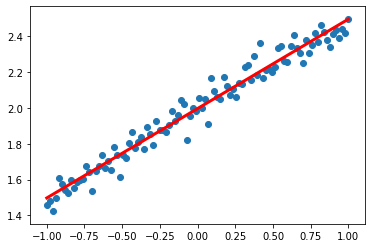

In [8]:
#神经网络反向传播的机制（单个神经元的例子）
#前向传播求损失值，反向传播更新W和b的值
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#定义真实值
x = np.linspace(-1,1,100)
noise = np.random.normal(0,0.05,x.shape)
y = 0.5*x + 2 + noise

#定义W(权值)和b（偏置值）,给定初始值为0
W = tf.Variable(0.)
b = tf.Variable(0.)
y_pre = W*x + b
#定义均方误差
loss = tf.reduce_mean(tf.square(y_pre - y))

#定义一个优化器
#0.2是学习率
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
with tf.Session() as sess:
    #对变量进行初始化
    sess.run(init)
    #训练201次
    for step in range(201):
        sess.run(train)
        if step%20 == 0:
            print("当前为第%d步"%step,"W的值是:",sess.run(W),"b的值是:",sess.run(b))
    plt.scatter(x,y)
    plt.plot(x,sess.run(y_pre),'r-',lw=3)
    print(sess.run(loss))

当前为第0步 W的值是: -0.00016894825 b的值是: 0.03287954
当前为第20步 W的值是: -0.0025735572 b的值是: 0.08219704
当前为第40步 W的值是: -0.0037857408 b的值是: 0.08219884
当前为第60步 W的值是: -0.004396813 b的值是: 0.08219884
当前为第80步 W的值是: -0.0047048596 b的值是: 0.08219884
当前为第100步 W的值是: -0.0048601497 b的值是: 0.08219884
当前为第120步 W的值是: -0.00493843 b的值是: 0.08219884
当前为第140步 W的值是: -0.0049778935 b的值是: 0.08219884
当前为第160步 W的值是: -0.004997787 b的值是: 0.08219884
当前为第180步 W的值是: -0.0050078165 b的值是: 0.08219884
当前为第200步 W的值是: -0.0050128726 b的值是: 0.08219884
0.0060764123


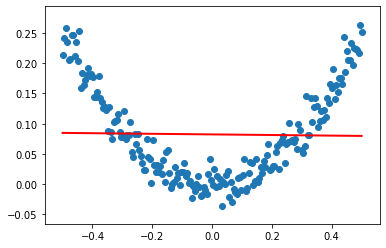

In [9]:
#较为复杂的问题
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#-1和+1之间生成的均匀分布的200个数，沿y轴延伸
x = np.linspace(-0.5,0.5,200)[:, np.newaxis]
noise = np.random.normal(0,0.02,x.shape)
# y = x^2
y = np.square(x) + noise

#定义W和b,给定初始值为0
W = tf.Variable(0.)
b = tf.Variable(0.)
y_pre = W*x + b

loss = tf.reduce_mean(tf.square(y_pre - y))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20 == 0:
            print("当前为第%d步"%step,"W的值是:",sess.run(W),"b的值是:",sess.run(b))
    plt.scatter(x,y)
    plt.plot(x,sess.run(y_pre),'r-',lw=2)
    print(sess.run(loss))

W1和b1分别为：
 [[-1.3995836  -1.2607524   0.5397258   0.66184235  0.47776118  0.9569222
   0.13370284  0.09662866 -0.7106885   1.458329  ]] [[-8.8244224e-01 -1.5834481e-01 -3.8243750e-01 -3.0264685e-01
  -2.4397773e-04 -5.7486778e-01 -1.3428798e-01 -2.0671597e-01
  -7.9907961e-02 -1.3422570e-01]]
W2和b2分别为：
 [[ 1.570617  ]
 [ 0.6750396 ]
 [ 0.7432907 ]
 [ 0.6281161 ]
 [-0.2462852 ]
 [ 1.2504019 ]
 [-0.59753543]
 [-2.0658445 ]
 [-0.2251695 ]
 [ 0.49478647]] [[-0.00644954]]
最终的loss为: 0.0032294209


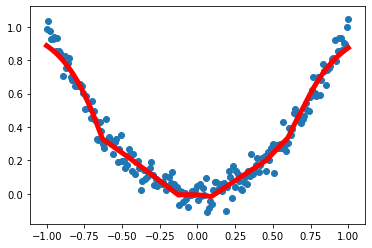

In [28]:
#神经网络典型的三层结构
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#-1和+1之间生成的均匀分布的200个数，沿y轴延伸
#定义真实数据
x_data = np.linspace(-1,1,200)[:, np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) + noise

#定义输入层
#定义占位符行数不限，列数为1(以后可以直接赋值)
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义中间层（也叫隐藏层）
#权值和偏置值均为1行10列
Weight_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weight_L1) + biases_L1
#L1为中间层的输出
L1 = tf.nn.relu(Wx_plus_b_L1)

#定义输出层
#中间层的输出作为输出层的输入
Weight_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weight_L2) + biases_L2
#采用双曲正切函数
prediction = tf.nn.tanh(Wx_plus_b_L2)

#定义损失函数
loss = tf.reduce_mean(tf.square(prediction - y))
#定义优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)
train_step = optimizer.minimize(loss)

init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    for step in range(3000):
        sess.run(train_step, feed_dict={x:x_data,y:y_data})
    #模型训练完成后进行预测
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    print("W1和b1分别为：\n",sess.run(Weight_L1),sess.run(biases_L1))
    print("W2和b2分别为：\n",sess.run(Weight_L2),sess.run(biases_L2))
    #打印最终的loss
    print("最终的loss为:",sess.run(loss,feed_dict={x:x_data, y: y_data}))
    plt.figure()
    #绘制真实值得散点图
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()